In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
#Set target variables
targets = ['@BBCWorld','@CBSNews','@CNN', '@FoxNews', '@nytimes']

# #Build dictionaries to store Compound Scores and Tweets Ago information
cpdBBC = {}
cpdCBS = {}
cpdCNN = {}
cpdFOX = {}
cpdNYT = {}

key1 = 'Compound Score'
key2 = 'Tweets Ago'

#Store analysis lists in a list to make it easier (i think) to grab
newsList = [cpdBBC, cpdCBS, cpdCNN, cpdFOX, cpdNYT]

#Twitter Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#obtain 100 tweets from each target, 5 pages X 20 tweets = 100 tweets
counter = 0
for target in targets:
    #newsList[counter] = {}
#     print(type(counter))
#     print(newsList[counter])
    newsList[counter][key1] = []
    newsList[counter][key2] = []
    
    for i in range(1):
        allTweets = api.user_timeline(target, count=100, result_type='recent')
        #loop through tweets found and perform VADER analysis on each tweet.
        #Dump results in list for each news outlet
        tweetCounter = 0
        for tweet in allTweets:
            results = analyzer.polarity_scores(tweet['text'])
            cpdResults = results['compound']
            newsList[counter][key1].append(cpdResults)
            newsList[counter][key2].append(tweetCounter)
            tweetCounter += 1
#     #Printing output to verify data looks appropriate
#     print(f'---------{target}----------')
#     print(f'Number of tweets: {len(newsList[counter])}.')
#     print(newsList[counter])
    counter += 1    

In [4]:
#convert dictionaries containing Compoung Scores and Tweets Ago to dataframe to create plots
dfBBC = pd.DataFrame(cpdBBC)
dfCBS = pd.DataFrame(cpdCBS)
dfCNN = pd.DataFrame(cpdCNN)
dfFOX = pd.DataFrame(cpdFOX)
dfNYT = pd.DataFrame(cpdNYT)
#compute overall compound score of the entire set captured.
avgBBC = dfBBC[key1].mean()
avgCBS = dfCBS[key1].mean()
avgCNN = dfCNN[key1].mean()
avgFOX = dfFOX[key1].mean()
avgNYT = dfNYT[key1].mean()

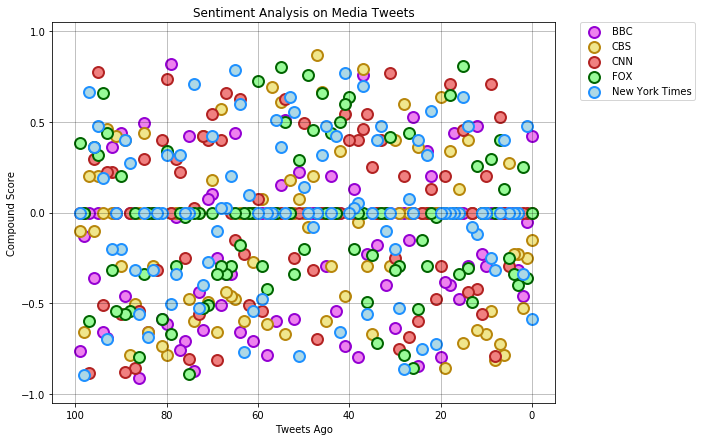

In [5]:
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(key2, key1, c='violet',alpha=1, s=120, edgecolors='darkviolet', linewidths=2, data=dfBBC, label='BBC')
ax.scatter(key2, key1, c='khaki',alpha=1, s=120, edgecolors='darkgoldenrod', linewidths=2, data=dfCBS, label='CBS')
ax.scatter(key2, key1, c='lightcoral',alpha=1, s=120, edgecolors='firebrick', linewidths=2, data=dfCNN, label='CNN')
ax.scatter(key2, key1, c='palegreen',alpha=1,s=120, edgecolors='darkgreen', linewidths=2, data=dfFOX, label='FOX')
ax.scatter(key2, key1, c='lightblue',alpha=1,s=120, edgecolors='dodgerblue', linewidths=2, data=dfNYT, label='New York Times')
ax.set_xlim(105, -5)
ax.set_ybound(-1.05, 1.05)
ax.set_yticks([-1, -0.5, 0, 0.5, 1.0])
ax.set_title('Sentiment Analysis on Media Tweets')
ax.grid(alpha=0.3, color='k', fillstyle='full')
ax.set_xlabel('Tweets Ago')
ax.set_ylabel('Compound Score')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
fig.savefig('SentimentAnalysis-1.png', bbox_inches='tight')
plt.show()

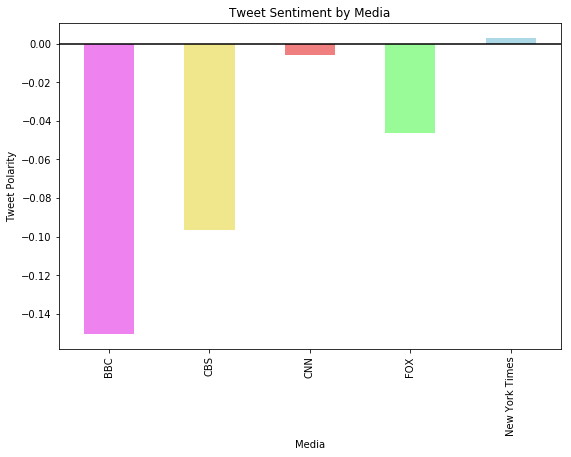

In [43]:
secondPlot = pd.Series(
    [avgBBC, avgCBS, avgCNN, avgFOX, avgNYT],
    index = ['BBC','CBS','CNN','FOX','New York Times']
)

#Set descriptions:
plt.title("Tweet Sentiment by Media")
plt.ylabel('Tweet Polarity')
plt.xlabel('Media')
plt.axhline(0, c='k')
#Plot the data:
my_colors = ['violet','khaki','lightcoral','palegreen','lightblue']
secondPlot.plot(
    figsize=(9,6),    
    kind='bar', 
    color=my_colors
)

plt.show()